## GMO's Approach 

1a) Why does GMO believe they can more easily predict long-run than short-run asset class performance?

GMO's approach believed that valuations are mean-reverting. In the short run, prices are driven by sentiment, momentum and macroeconomic factors which are diffucult to predict. However, over the long-run, valuations tended to revert to historical avergaes, allowing more reliable forecasting/ 

1b) The predicting variables used by GMO include P/E ratio, profit margin, real sales growth per share and dividend yield. 

1c) GMO's mean reversion philosophy often lead them to having contrarian views as they take positions that oppose prevailing market trends.

1d) A famous quote mentioned in the case is that markets are wrong longer than clients are patient (something to that effect). GMO's prediction turned out to be true in most cases, however, when this contrarian view is not paying off in the short term, it could lead clients to pull money (business risk) and investors to lose their jobs (career risk). 

## The Market Environment 

2a) The case mentions that the cyclically adjust P/E ratio of the S-and-P being higher than its long run average (19.9 vs 16) made GMO sceptical that companies could sustian record profits. GMO was also pessimistic about future earnings growth. 

2b) GMO believed that both P/E rations and profit margins were elevated and would compress meaningfully going forward. 

2c) The expected change in P/E ration

## Exhibit 1 

3a) US Equities 
3b) Emerging market equities 
3c) US Treasuries


## Fund Performance 

4a) US Fixed Income 
4b) GMWAX under performed the bench marks in 7 out of the 15 examined years and when it outperformed the benchmark, it was often in times of extreme poor performance of the benchmark. 

In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import portfolio_management_helper as pmh 
import statsmodels.api as sm 

infile = "../data/gmo_data.xlsx"
check = pd.read_excel(infile, sheet_name=None)
sheets = list(check.keys())
info = pmh.read_excel_default(infile, sheet_name=sheets[0])
signals = pmh.read_excel_default(infile, index_col=0, parse_dates=True, sheet_name=sheets[1])
risk_free = pmh.read_excel_default(infile, index_col=0, parse_dates=True, sheet_name=sheets[2])
returns = pmh.read_excel_default(infile, index_col=0, parse_dates=True, sheet_name=sheets[3])
risk_free = risk_free/12
returns = returns.subtract(risk_free['TBill 3M'], axis=0)


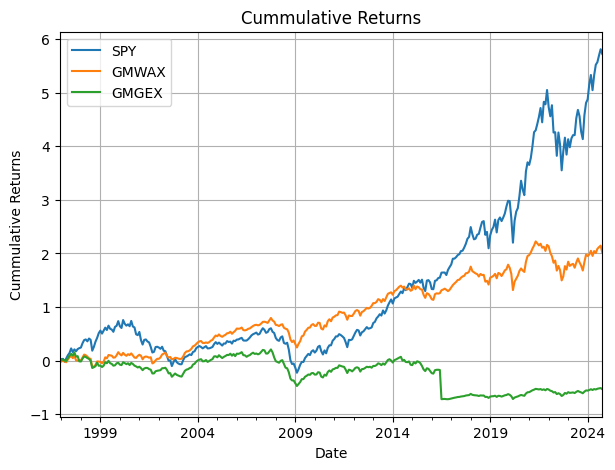

In [24]:
pmh.calc_cummulative_returns(returns)

In [25]:
pmh.calc_summary_statistics(returns, annual_factor=12, provided_excess_returns=True, 
                            timeframes={'Inception - 2011':[None, '2011'], 
                                        '2012 - Present': ['2012', None], 
                                        'Inception - Present': [None, None]}, 
                                        keep_columns= ['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe'], 
                                        keep_indexes='GMWAX')

,Annualized Mean,Annualized Vol,Annualized Sharpe
GMWAX Inception - 2011,0.0464,0.1105,0.4201
GMWAX 2012 - Present,0.0434,0.0949,0.4573
GMWAX Inception - Present,0.0450,0.1035,0.4352


Since the case, the performance of GMWAX has not changed much. There was a slight decrease in mean returns (0.0464 -> 0.0434), however, there was a decreaed in volatility which led to an slight increase in Sharpe ratio after the case. 

In [26]:
pmh.calc_summary_statistics(returns, annual_factor=12, provided_excess_returns=True, var_quantile=0.05,  
                            timeframes={'Inception - 2011':[None, '2011'], 
                                        '2012 - Present': ['2012', None], 
                                        'Inception - Present': [None, None]}, 
                                        keep_columns= ['Annualized Historical Var', 'Max Drawdown', 'Min'], 
                                        keep_indexes='GMWAX')

,Min,Annualized Historical VaR (5.00%),Max Drawdown
GMWAX Inception - 2011,-0.1492,-0.1524,-0.3065
GMWAX 2012 - Present,-0.1150,-0.1415,-0.2256
GMWAX Inception - Present,-0.1492,-0.1433,-0.3065


In [27]:
pmh.calc_summary_statistics(returns, annual_factor=12, provided_excess_returns=True, var_quantile=0.05,  
                            timeframes={'Inception - 2011':[None, '2011'], 
                                        '2012 - Present': ['2012', None], 
                                        'Inception - Present': [None, None]}, 
                                        keep_columns= ['Annualized Historical Var', 'Max Drawdown', 'Min'], 
                                        keep_indexes='SPY')

,Min,Annualized Historical VaR (5.00%),Max Drawdown
SPY Inception - 2011,-0.1656,-0.2779,-0.5592
SPY 2012 - Present,-0.1247,-0.2175,-0.2477
SPY Inception - Present,-0.1656,-0.2760,-0.5592


The statistics indicate a high tail-risk, with a max drawdonw of -30.65% and and a relatively large VaR of between [-15.24%,-14.15%]. However, the time period examined includes multiple financial crises (dot come bubble, 08 crisis). When compared with the tail-risk of SPY, the risk of GMWAX is less pronounced. Since, the case study, the global economy has seen less of these crises which could explain why the tail-risk of GMWAX appears to have decreased between 2012-present, as evidenced by the VaR and Max Drawdown statistics.  

In [28]:
pmh.calc_regression(returns[['GMWAX']], returns[['SPY']], annual_factor=12, intercept=True, 
                    keep_columns=['Annualized Alpha', 'R-Squared', 'SPY Beta'], 
                    timeframes= {'Inception - 2011': [None, '2011'], 
                                 '2012 - Present': ['2012', None],
                                 'Inception - Present': [None, None]})

"calc_regression" assumes excess returns to calculate Information and Treynor Ratios


,Annualized Alpha,R-Squared,SPY Beta
GMWAX Inception - 2011,0.0270,0.6487,0.5421
GMWAX 2012 - Present,-0.0340,0.7487,0.5818
GMWAX Inception - Present,0.0006,0.6802,0.5526


b) Market beta for GMWAX since inception is around 0.55 which indicates it is a low beta strategy. Since the case, GMWAX's market beta increased slightly from 0.5421 to 0.5818. 

c) Prior to the case, the annualized alpha statistics indicates that GMWAX provided around 2.70% of alpha over the market, however, since the case, alpha decreased to -3.40%. All in all, over the period of inception - present, the annualized alpha statistic of 0.06% indicates that the GMWAX does not provide alpha. 

In [29]:
pmh.calc_summary_statistics(returns, annual_factor=12, provided_excess_returns=True, 
                            timeframes={'Inception - 2011':[None, '2011'], 
                                        '2012 - Present': ['2012', None], 
                                        'Inception - Present': [None, None]}, 
                                        keep_columns= ['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe', 'Annualized Historical Var', 'Max Drawdown', 'Min'], 
                                        keep_indexes=['GMGEX', 'GMWAX'])

,Annualized Mean,Annualized Vol,Annualized Sharpe,Min,Annualized Historical VaR (5.00%),Max Drawdown
GMWAX Inception - 2011,0.0464,0.1105,0.4201,-0.1492,-0.1524,-0.3065
GMGEX Inception - 2011,-0.0038,0.1473,-0.0260,-0.1516,-0.2851,-0.5640
GMWAX 2012 - Present,0.0434,0.0949,0.4573,-0.1150,-0.1415,-0.2256
GMGEX 2012 - Present,0.0013,0.2356,0.0056,-0.6589,-0.2357,-0.7383
GMWAX Inception - Present,0.0450,0.1035,0.4352,-0.1492,-0.1433,-0.3065
GMGEX Inception - Present,-0.0015,0.1926,-0.0076,-0.6589,-0.2640,-0.7681


2.4) The returns of GMO's equity fund has consistenly been less than its macro counterpart. Additionally, the equity fund has seen more volatility resulting in a substantially lower Sharpe ratio. The tail-risk of the equity fund is also greater, with more negative Max Drawdown and VaR statistics. 

In [30]:
spy_shift = returns['SPY'].shift(-1)

# Dividend Yield 
dividend_yield = pmh.calc_regression(spy_shift, signals[['SPX DVD YLD']], annual_factor=12, intercept=True, 
                    keep_columns=['Annualized Alpha', 'SPX DVD YLD Beta', 'R-Squared'], warnings=False, return_fitted_values=True) * 100
dividend_yield.columns = ['Dividend Yield']
pmh.calc_regression(spy_shift, signals[['SPX DVD YLD']], annual_factor=12, intercept=True, 
                    keep_columns=['Annualized Alpha', 'SPX DVD YLD Beta', 'R-Squared','Annualized Information Ratio'], warnings=False)


,Annualized Alpha,R-Squared,SPX DVD YLD Beta,Annualized Information Ratio
SPY,-0.2055,0.0140,0.0132,-1.3394


In [31]:
# Earnings price ratio
pe_ratio = pmh.calc_regression(spy_shift, signals[['SPX P/E']], annual_factor=12, intercept=True, 
                    keep_columns=['Annualized Alpha', 'SPX P/E Beta', 'R-Squared'], warnings=False, return_fitted_values=True) * 100 
pe_ratio.columns  = ['P/E Ratio']
pmh.calc_regression(spy_shift, signals[['SPX P/E']], annual_factor=12, intercept=True, 
                    keep_columns=['Annualized Alpha', 'SPX P/E Beta', 'R-Squared', 'Annualized Information Ratio'], warnings=False)


,Annualized Alpha,R-Squared,SPX P/E Beta,Annualized Information Ratio
SPY,0.2721,0.0060,-0.0008,1.7662


In [32]:
# DVD YLD, P/E Ratio, 10-yr Yield
all_three = pmh.calc_regression(spy_shift, signals, annual_factor=12, intercept=True, 
                    keep_columns=['Annualized Alpha', 'Beta', 'R-Squared'], warnings=False, return_fitted_values=True) * 100 
all_three.columns = ['All Three']
pmh.calc_regression(spy_shift, signals, annual_factor=12, intercept=True, 
                    keep_columns=['Annualized Alpha', 'Beta', 'R-Squared', 'Annualized Information Ratio'], warnings=False)

,Annualized Alpha,R-Squared,SPX DVD YLD Beta,SPX P/E Beta,TNote 10YR Beta,Annualized Information Ratio
SPY,-0.1865,0.0165,0.0126,0.0002,-0.0015,-1.2170


In [33]:
pmh.calc_summary_statistics(dividend_yield, annual_factor=12, provided_excess_returns=True,  
                                        keep_columns= ['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe', 'Annualized Historical Var', 'Max Drawdown', 'Min'])

,Annualized Mean,Annualized Vol,Annualized Sharpe,Min,Annualized Historical VaR (5.00%),Max Drawdown
Dividend Yield,8.1732,1.8310,4.4638,-0.3210,-0.4028,-0.9914


In [34]:
pmh.calc_summary_statistics(pe_ratio, annual_factor=12, provided_excess_returns=True,  
                                        keep_columns= ['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe', 'Max Drawdown'])

,Annualized Mean,Annualized Vol,Annualized Sharpe,Max Drawdown
P/E Ratio,8.1732,1.1993,6.8149,-0.7181


In [35]:
pmh.calc_summary_statistics(all_three, annual_factor=12, provided_excess_returns=True,  
                                        keep_columns= ['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe', 'Max Drawdown'])

,Annualized Mean,Annualized Vol,Annualized Sharpe,Max Drawdown
All Three,8.1732,1.9826,4.1224,-1.0000


In [36]:

Y = returns['SPY']
X = signals[['SPX DVD YLD', 'SPX P/E', 'TNote 10YR']]

window_size = 60  

predicted_values = []
prediction_errors = []
actual_values = []

for t in range(window_size, len(Y)):
    Y_train = Y.iloc[t - window_size:t]
    X_train = X.iloc[t - window_size:t]
    X_train_const = sm.add_constant(X_train, has_constant='add')
    model = sm.OLS(Y_train, X_train_const).fit()
    X_test = X.iloc[[t]]  
    X_test_const = sm.add_constant(X_test, has_constant='add')
    Y_pred = model.predict(X_test_const).iloc[0]
    Y_actual = Y.iloc[t]
    error = Y_actual - Y_pred
    
    # Store the results
    predicted_values.append(Y_pred)
    prediction_errors.append(error)
    actual_values.append(Y_actual)



actual_mean = sum(actual_values)/len(actual_values)
predicted_mean = sum(predicted_values)/len(predicted_values)

e_null = actual_mean - predicted_mean
errors_squared = [x ** 2 for x in prediction_errors]
e_forecast = sum(errors_squared)

oos_rsquared = 1 - (e_forecast/(e_null**2))

print(f"The OOS R-squared is: {oos_rsquared}")



The OOS R-squared is: -191334.94717706516


In [ ]:
pmh.calc_summary_statistics(pd.DataFrame(predicted_values))

TypeError: Can only merge Series or DataFrame objects, a <class 'numpy.float64'> was passed